**With Traffic light**

Episode 1, Steps: 1000, Reward: 6560.00
Episode 2, Steps: 1000, Reward: 6516.00
Episode 3, Steps: 1000, Reward: 6470.00
Episode 4, Steps: 1000, Reward: 6648.00
Episode 5, Steps: 1000, Reward: 6598.00
Episode 6, Steps: 1000, Reward: 6494.00
Episode 7, Steps: 1000, Reward: 6556.00
Episode 8, Steps: 1000, Reward: 6522.00
Episode 9, Steps: 1000, Reward: 6604.00
Episode 10, Steps: 1000, Reward: 6718.00
Episode 11, Steps: 1000, Reward: 6482.00
Episode 12, Steps: 1000, Reward: 6686.00
Episode 13, Steps: 1000, Reward: 7546.00
Episode 14, Steps: 1000, Reward: 6462.00
Episode 15, Steps: 1000, Reward: 6504.00
Episode 16, Steps: 1000, Reward: 6548.00
Episode 17, Steps: 1000, Reward: 6586.00
Episode 18, Steps: 1000, Reward: 6558.00
Episode 19, Steps: 1000, Reward: 6522.00
Episode 20, Steps: 1000, Reward: 6410.00
Episode 21, Steps: 1000, Reward: 6454.00
Episode 22, Steps: 1000, Reward: 6538.00
Episode 23, Steps: 1000, Reward: 6460.00
Episode 24, Steps: 1000, Reward: 6520.00
Episode 25, Steps: 1000, 

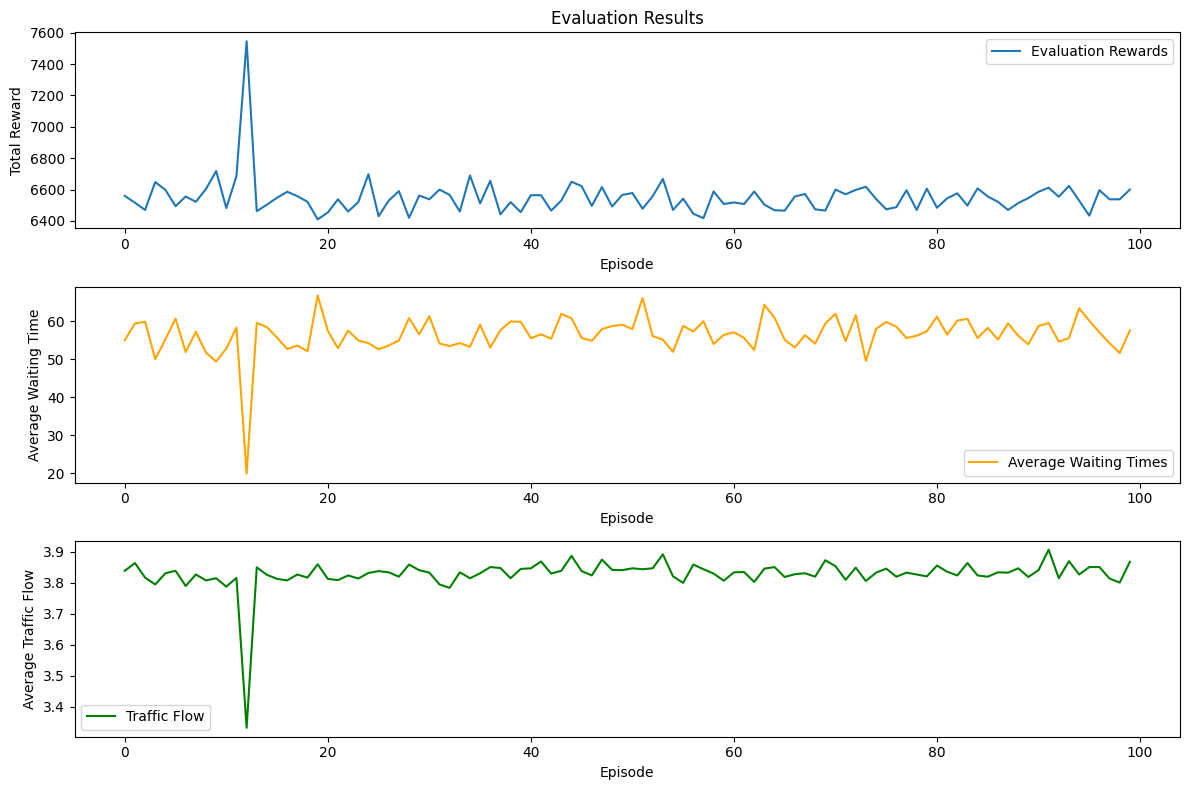

In [1]:
import numpy as np
import traci
import matplotlib.pyplot as plt

# Q-Learning Parameters
ALPHA = 0.1  # Learning rate
GAMMA = 0.9  # Discount factor
EPSILON = 0.1  # Exploration-exploitation balance
EPSILON_DECAY = 0.99
MIN_EPSILON = 0.01
MAX_EPISODES = 100
MAX_STEPS = 1000
NUM_ACTIONS = 2  # Number of actions (0: allow, 1: block)

# Environment Setup
SUMO_CMD = ["sumo", "-c", "D:/3CS/RL/rl for ramp metering/sumo/mynet.sumocfg"]

# State representation function
def get_state():
    highway_density = traci.edge.getLastStepVehicleNumber("2to3")
    ramp_queue = traci.edge.getLastStepHaltingNumber("intramp")
    return (highway_density, ramp_queue)

# Discretize state space (example)
def discretize_state(highway_density, ramp_queue):
    highway_bucket = min(highway_density // 5, 19)  # Increase granularity
    ramp_bucket = min(ramp_queue // 1, 19)  # Increase granularity
    return highway_bucket * 20 + ramp_bucket

# Reward function
def compute_reward(highway_density, ramp_queue):
    throughput = traci.edge.getLastStepVehicleNumber("2to3") * 10
    waiting_penalty = ramp_queue * 2
    return throughput - waiting_penalty  # Reward throughput, penalize queue

# Step function to advance the simulation
def step_simulation(action):
    flow_rates = [200, 400, 600, 800]
    traci.edge.setMaxSpeed("intramp", flow_rates[action]/3600)
    
    traci.simulationStep()
    highway_density = traci.edge.getLastStepVehicleNumber("2to3")
    ramp_queue = traci.edge.getLastStepHaltingNumber("intramp")
    next_state = discretize_state(highway_density, ramp_queue)
    reward = compute_reward(highway_density, ramp_queue)
    done = traci.simulation.getMinExpectedNumber() == 0

    return next_state, reward, done

# Policy evaluation function
def evaluate_policy(q_table_path, episodes=100):
    # Load Q-table
    Q_table = np.load(q_table_path, allow_pickle=True).item()
    
    results = []
    rewards_over_time = []
    avg_ramp_waiting_times = []
    avg_vehicle_throughputs = []
    
    for episode in range(episodes):
        traci.start(SUMO_CMD)
        state = discretize_state(*get_state())
        total_reward = 0
        total_ramp_waiting_time = 0
        total_vehicle_throughput = 0
        step = 0
        episode_rewards = []
        
        while step < MAX_STEPS:
            if state in Q_table:
                action = np.argmax(Q_table[state])
            else:
                action = np.random.randint(NUM_ACTIONS)
            next_state, reward, done = step_simulation(action)
            
            total_reward += reward
            episode_rewards.append(reward)
            
            # Collect metrics
            ramp_waiting_time = traci.edge.getWaitingTime("intramp")
            total_ramp_waiting_time += ramp_waiting_time
            highway_throughput = traci.edge.getLastStepVehicleNumber("2to3")
            ramp_throughput = traci.edge.getLastStepVehicleNumber("intramp")
            total_vehicle_throughput += (highway_throughput + ramp_throughput)
            
            state = next_state
            step += 1
            if done:
                break
        
        traci.close()
        results.append(total_reward)
        rewards_over_time.append(episode_rewards)
        avg_ramp_waiting_times.append(total_ramp_waiting_time / step)
        avg_vehicle_throughputs.append(total_vehicle_throughput / step)
        
        print(f"Episode {episode+1}, Steps: {step}, Reward: {total_reward:.2f}")
    
    return results, rewards_over_time, avg_ramp_waiting_times, avg_vehicle_throughputs

# Test controlled scenario
controlled_results, controlled_rewards_over_time, avg_ramp_waiting_times, avg_vehicle_throughputs = evaluate_policy("trained_q_table.npy")

# Plot evaluation results
plt.figure(figsize=(12, 8))

# Total Reward
plt.subplot(3, 1, 1)
plt.plot(controlled_results, label="Evaluation Rewards")
plt.title("Evaluation Results")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()

# Average Waiting Time
plt.subplot(3, 1, 2)
plt.plot(avg_ramp_waiting_times, color='orange', label="Average Waiting Times")
plt.xlabel("Episode")
plt.ylabel("Average Waiting Time")
plt.legend()

# Traffic Flow Efficiency
plt.subplot(3, 1, 3)
plt.plot(avg_vehicle_throughputs, color='green', label="Traffic Flow")
plt.xlabel("Episode")
plt.ylabel("Average Traffic Flow")
plt.legend()

plt.tight_layout()
plt.show()

**Without Traffic light**

Evaluating trained policy...
Evaluation Episode 1/50
Evaluation Episode 2/50
Evaluation Episode 3/50
Evaluation Episode 4/50
Evaluation Episode 5/50
Evaluation Episode 6/50
Evaluation Episode 7/50
Evaluation Episode 8/50
Evaluation Episode 9/50
Evaluation Episode 10/50
Evaluation Episode 11/50
Evaluation Episode 12/50
Evaluation Episode 13/50
Evaluation Episode 14/50
Evaluation Episode 15/50
Evaluation Episode 16/50
Evaluation Episode 17/50
Evaluation Episode 18/50
Evaluation Episode 19/50
Evaluation Episode 20/50
Evaluation Episode 21/50
Evaluation Episode 22/50
Evaluation Episode 23/50
Evaluation Episode 24/50
Evaluation Episode 25/50
Evaluation Episode 26/50
Evaluation Episode 27/50
Evaluation Episode 28/50
Evaluation Episode 29/50
Evaluation Episode 30/50
Evaluation Episode 31/50
Evaluation Episode 32/50
Evaluation Episode 33/50
Evaluation Episode 34/50
Evaluation Episode 35/50
Evaluation Episode 36/50
Evaluation Episode 37/50
Evaluation Episode 38/50
Evaluation Episode 39/50
Evalu

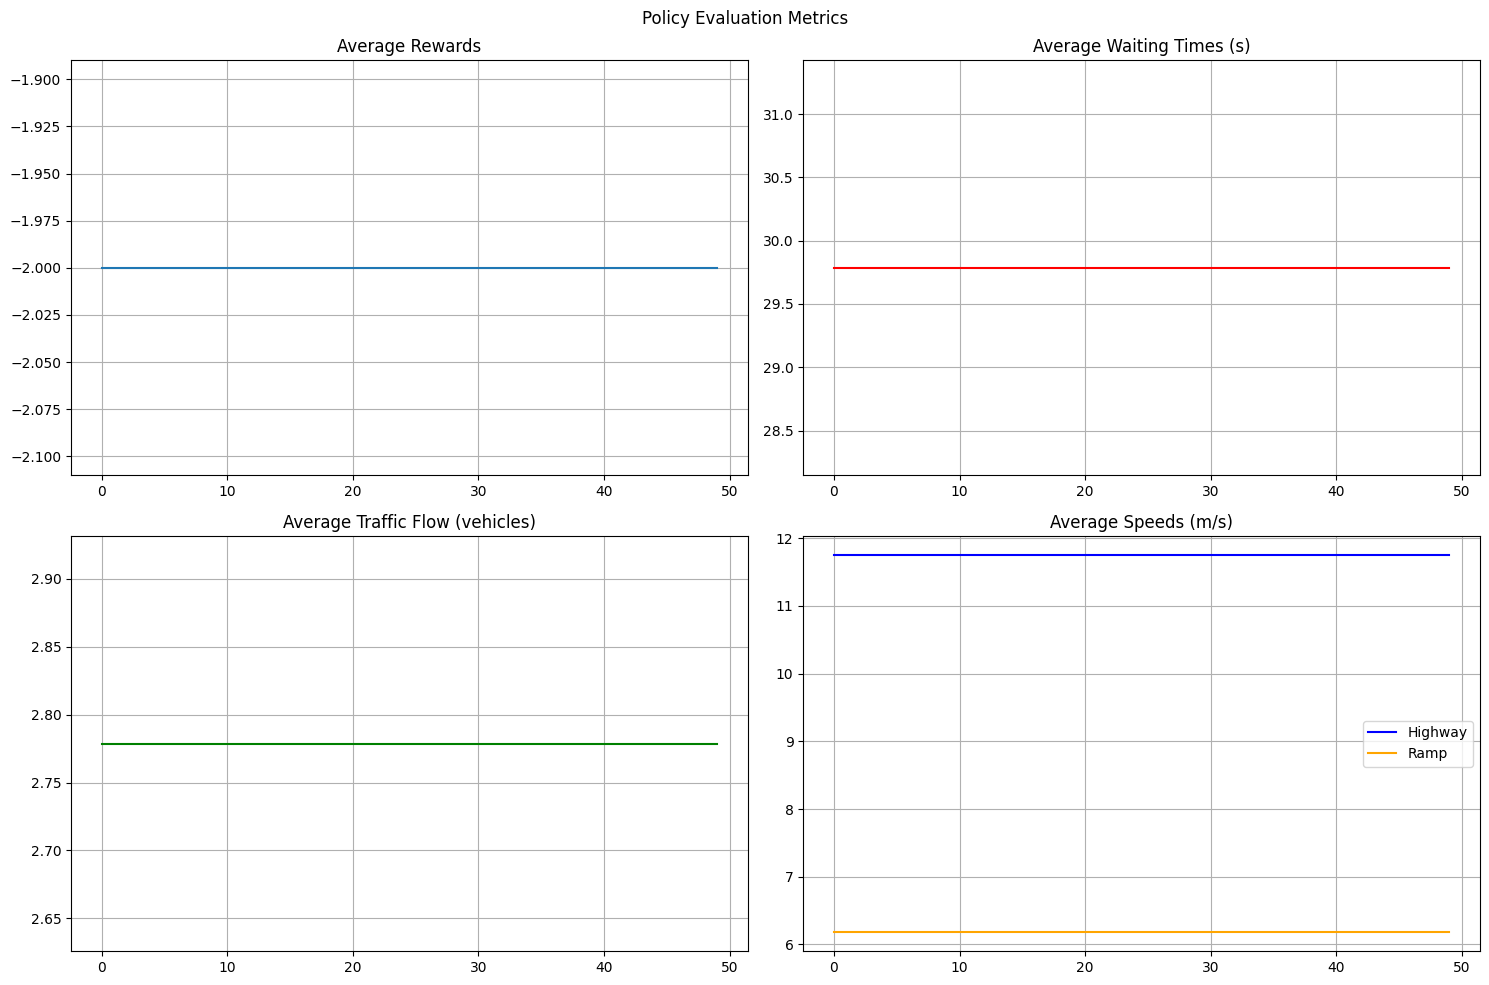


Evaluation Summary:

Rewards:
  Mean: -2.00
  Std:  0.00
  Min:  -2.00
  Max:  -2.00

Waiting Times:
  Mean: 29.79
  Std:  0.00
  Min:  29.79
  Max:  29.79

Traffic Flow:
  Mean: 2.78
  Std:  0.00
  Min:  2.78
  Max:  2.78

Highway Speeds:
  Mean: 11.75
  Std:  0.00
  Min:  11.75
  Max:  11.75

Ramp Speeds:
  Mean: 6.18
  Std:  0.00
  Min:  6.18
  Max:  6.18


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import os
import sys
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

if 'SUMO_HOME' in os.environ:
    tools = os.path.join(os.environ['SUMO_HOME'], 'tools')
    sys.path.append(tools)
else:
    sys.exit("SUMO_HOME not found")

import traci

class RampMeteringEnv:
    def __init__(self):
        self.cfg_path = str(Path("D:/3CS/RL/rl for ramp metering/sumo/mynet.sumocfg"))
        self.sumoCmd = ["sumo", "-c", self.cfg_path, "--no-step-log", "--no-warnings"]

        # Fixed lengths from SUMO network
        self.highway_length = 1000  # meters
        self.ramp_length = 100      # meters

        # Normalization constants
        self.MAX_DENSITY = 20.0
        self.MAX_QUEUE = 10.0
        self.MAX_SPEED = 13.89
        self.MAX_WAIT_TIME = 300.0

        # Q-learning parameters
        self.n_states = 4
        self.n_actions = 4  # Different metering rates
        self.q_table = {}

        # Network elements
        self.highway = "2to3"
        self.ramp = "intramp"

    def start_simulation(self):
        try:
            traci.start(self.sumoCmd)
            return True
        except Exception as e:
            print(f"Error: {e}")
            return False

    def get_state(self):
        # Highway metrics (using fixed length)
        highway_density = traci.edge.getLastStepVehicleNumber(self.highway) / (self.highway_length/1000)
        highway_speed = traci.edge.getLastStepMeanSpeed(self.highway)

        # Ramp metrics
        ramp_queue = traci.edge.getLastStepHaltingNumber(self.ramp)
        ramp_speed = traci.edge.getLastStepMeanSpeed(self.ramp)

        # Normalize values
        norm_density = min(highway_density / self.MAX_DENSITY, 1.0)
        norm_queue = min(ramp_queue / self.MAX_QUEUE, 1.0)
        norm_highway_speed = min(highway_speed / self.MAX_SPEED, 1.0)
        norm_ramp_speed = min(ramp_speed / self.MAX_SPEED, 1.0)

        return tuple([norm_density, norm_queue, norm_highway_speed, norm_ramp_speed])

    def get_q_value(self, state, action=None):
        if state not in self.q_table:
            self.q_table[state] = np.zeros(self.n_actions)
        if action is None:
            return self.q_table[state]
        return self.q_table[state][action]

    def take_action(self, action):
        # Define ramp inflow rates based on actions (e.g., vehicles per second)
        inflow_rates = [0.2, 0.5, 1.0, 2.0]  # vehicles/second
        inflow_rate = inflow_rates[action]

        try:
            # Control ramp inflow by adding vehicles at a controlled rate
            traci.edge.adaptTraveltime(self.ramp, 1 / inflow_rate)  # Adjust travel time to simulate metering

            # Simulate for a fixed number of steps (e.g., 10 seconds)
            for _ in range(10):
                if traci.simulation.getMinExpectedNumber() <= 0:
                    return self.get_state(), 0, True
                traci.simulationStep()

            return self.get_state(), self.calculate_reward(), False
        except Exception as e:
            print(f"Error during action execution: {e}")
            return self.get_state(), 0, True

    def calculate_reward(self):
        waiting_time = (traci.edge.getWaitingTime(self.highway) + 
                        traci.edge.getWaitingTime(self.ramp))

        vehicles = (traci.edge.getLastStepVehicleNumber(self.highway) + 
                    traci.edge.getLastStepVehicleNumber(self.ramp))

        return (-waiting_time + vehicles * 10)
def evaluate_policy(episodes=50):
    # Load trained model
    try:
        q_table = np.load('trained_q_table_no_traffic_light.npy', allow_pickle=True).item()
    except:
        print("No trained model found")
        return
    
    env = RampMeteringEnv()
    metrics = defaultdict(list)
    
    for episode in range(episodes):
        if not env.start_simulation():
            continue
            
        state = env.get_state()
        episode_metrics = {
            'rewards': 0,
            'waiting_times': 0,
            'traffic_flow': 0,
            'highway_speeds': 0,
            'ramp_speeds': 0
        }
        step = 0
        
        while True:
            # Use trained policy (no exploration)
            action = np.argmax(q_table[state])
            
            # Take action and get next state
            next_state, reward, done = env.take_action(action)
            
            # Collect metrics
            episode_metrics['rewards'] += reward
            episode_metrics['waiting_times'] += (traci.edge.getWaitingTime(env.highway) + 
                                              traci.edge.getWaitingTime(env.ramp))
            episode_metrics['traffic_flow'] += (traci.edge.getLastStepVehicleNumber(env.highway) + 
                                             traci.edge.getLastStepVehicleNumber(env.ramp))
            episode_metrics['highway_speeds'] += traci.edge.getLastStepMeanSpeed(env.highway)
            episode_metrics['ramp_speeds'] += traci.edge.getLastStepMeanSpeed(env.ramp)
            
            state = next_state
            step += 1
            
            if done:
                break
        
        # Average metrics over steps
        for key in episode_metrics:
            episode_metrics[key] /= step
            metrics[key].append(episode_metrics[key])
            
        traci.close()
        print(f"Evaluation Episode {episode+1}/{episodes}")
    
    # Plot results
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Policy Evaluation Metrics')
    
    axes[0,0].plot(metrics['rewards'], label='Rewards')
    axes[0,0].set_title('Average Rewards')
    axes[0,0].grid(True)
    
    axes[0,1].plot(metrics['waiting_times'], label='Waiting Times', color='red')
    axes[0,1].set_title('Average Waiting Times (s)')
    axes[0,1].grid(True)
    
    axes[1,0].plot(metrics['traffic_flow'], label='Traffic Flow', color='green')
    axes[1,0].set_title('Average Traffic Flow (vehicles)')
    axes[1,0].grid(True)
    
    axes[1,1].plot(metrics['highway_speeds'], label='Highway', color='blue')
    axes[1,1].plot(metrics['ramp_speeds'], label='Ramp', color='orange')
    axes[1,1].set_title('Average Speeds (m/s)')
    axes[1,1].legend()
    axes[1,1].grid(True)
    
    plt.tight_layout()
    plt.savefig('evaluation_metrics.png')
    plt.show()
    
    # Print summary statistics
    print("\nEvaluation Summary:")
    for key in metrics:
        values = metrics[key]
        print(f"\n{key.replace('_', ' ').title()}:")
        print(f"  Mean: {np.mean(values):.2f}")
        print(f"  Std:  {np.std(values):.2f}")
        print(f"  Min:  {np.min(values):.2f}")
        print(f"  Max:  {np.max(values):.2f}")
    
    return metrics

# To evaluate:
print("Evaluating trained policy...")
evaluation_results = evaluate_policy(episodes=50)